In [1]:
#!pip install delayed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy, sklearn
import os
import seaborn as sns

# Veri Seti
Kullandığımız veri seti 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source', 'Class' kolonlarından oluşuyor. 

Amacımız bize verilen TSH, pregnancy, age, sex vb. degerlere göre, hastanın tiroid ya da negative olduğunu bulmak.

Ver

In [2]:
columns = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 
           'On Antithyroid Medication', 'Sick', 'Pregnant', 
           'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 
           'Query Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 
           'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 
           'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 
           'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source', 'Class']

thyroid_df = pd.read_csv("sick.data", names = columns)

#Veride classtan sonra .|2131 seklinde hasta numaralari yaziyor. Onlari kaldirdik.
for i in range(len(thyroid_df['Class'])):
    thyroid_df['Class'][i] = thyroid_df['Class'][i].split('.')[0]

## Eksik Verilerin Tespiti

In [3]:
#Her sutundaki eksik veri sayisi
for column in thyroid_df.columns:
    sum = 0 
    for value in thyroid_df[column]:      
        if value == '?':
            sum +=1 
    print("{}: {}".format(column, sum))

Age: 1
Sex: 110
On Thyroxine: 0
Query on Thyroxine: 0
On Antithyroid Medication: 0
Sick: 0
Pregnant: 0
Thyroid Surgery: 0
I131 Treatment: 0
Query Hypothyroid: 0
Query Hyperthyroid: 0
Lithium: 0
Goitre: 0
Tumor: 0
Hypopituitary: 0
Psych: 0
TSH Measured: 0
TSH: 284
T3 Measured: 0
T3: 585
TT4 Measured: 0
TT4: 184
T4U Measured: 0
T4U: 297
FTI Measured: 0
FTI: 295
TBG Measured: 0
TBG: 2800
Referral Source: 0
Class: 0


Refferal Source bilgisi datanın hangi hastaneden sağlandığıyla alakalı olduğu için sonucumuzla alakasız.
Bu yüzden bu kolonu kaldırdık. TBGde tüm değerler eksik ve TBG Measureddeki tüm değerler de dolaylı olarak '0'.Bu yüzden bu sütunlar da kaldırıldı.

In [4]:
#Refferal Source konuyla alakasiz ve TBG deki tum veriler eksik
#Bu yuzden Refferal Source, TBG ve TBG Measured sutunlarini kaldiriyoruz
thyroid_df = thyroid_df.drop(columns=['Referral Source', 'TBG', 'TBG Measured'])

In [18]:
thyroid_df

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Class
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.300000,1.0,2.500000,1.0,125.0,1.0,1.140000,1.0,109.000000,0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.100000,1.0,2.000000,1.0,102.0,0.0,0.997912,0.0,110.787984,0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.980000,0.0,2.023484,1.0,109.0,1.0,0.910000,1.0,120.000000,0
3,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.720000,1.0,1.200000,1.0,61.0,1.0,0.870000,1.0,70.000000,0
4,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.654025,0.0,2.023484,1.0,72.0,1.0,0.920000,1.0,78.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.900000,1.0,1.700000,1.0,167.0,1.0,1.210000,1.0,137.000000,0
2069,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.700000,0.0,2.023484,1.0,155.0,1.0,1.050000,1.0,148.000000,0
2070,73.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.654025,1.0,0.700000,1.0,63.0,1.0,0.880000,1.0,72.000000,1
2071,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.400000,0.0,2.023484,1.0,100.0,1.0,0.830000,1.0,121.000000,0


Kategorik değerlere sahip olan sütunlar 0 ve 1 lere çevrildi.
Veri setinde eksik veriler soru işareti ile etiketlenmiş. Eksik verileri np.nan a dönüştürüp, SimpleImputer ile
aynı sütundaki verilerin ortalaması ile dolduruldu.

Veri setinde classı 0 olan veriler fazla olduğu için, bu classa sahip ve 3 ten fazla eksik verisi olan satırlar silindi

In [6]:
for column in thyroid_df.columns:

    thyroid_df.loc[thyroid_df[column] == '?', column] = np.nan
    
    if column == 'Class':
        thyroid_df.loc[thyroid_df[column] == 'negative', column] = 0
        thyroid_df.loc[thyroid_df[column] == 'sick', column] = 1
    
    elif column == 'Sex':
            thyroid_df.loc[thyroid_df[column] == 'F', column] = 0
            thyroid_df.loc[thyroid_df[column] == 'M', column] = 1
    
    else:
        thyroid_df.loc[thyroid_df[column] == 'f', column] = 0
        thyroid_df.loc[thyroid_df[column] == 't', column] = 1
    
    thyroid_df[column] = pd.to_numeric(thyroid_df[column])


In [7]:
#Burayi df.loc kullanarak yazabilirsin. Yavas calisiyo
#3'ten fazla eksik verisi olan satirlari siliyoruz. 
#Bu satirlarin hepsinin classi negative
#Elimizde zaten fazlasiyla negative classli veri var.

indices = list()
for row in range(0,len(thyroid_df-1)):
    sum = 0
    for column in thyroid_df.columns:
        if np.isnan(thyroid_df.iloc[row][column]):
            sum +=1
    if sum > 3:
        indices.append(row)

thyroid_df.drop(index = indices, inplace = True)
thyroid_df.reset_index(drop=True, inplace = True)
print(len(thyroid_df))

2619


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

for column in thyroid_df.columns[0:-1]:
    thyroid_df[column]= imputer.fit_transform(thyroid_df[column].values.reshape(-1,1))


## Outlier Detection
Quantile aralıklar kullanılarak, kategorik olmayan, sürekli sayılara sahip olan sütunlarda outlierler tespit edildi. Ve outlier içeren sütunlar veri kümesinden atıldı


Text(0.5, 1.0, 'FTI')

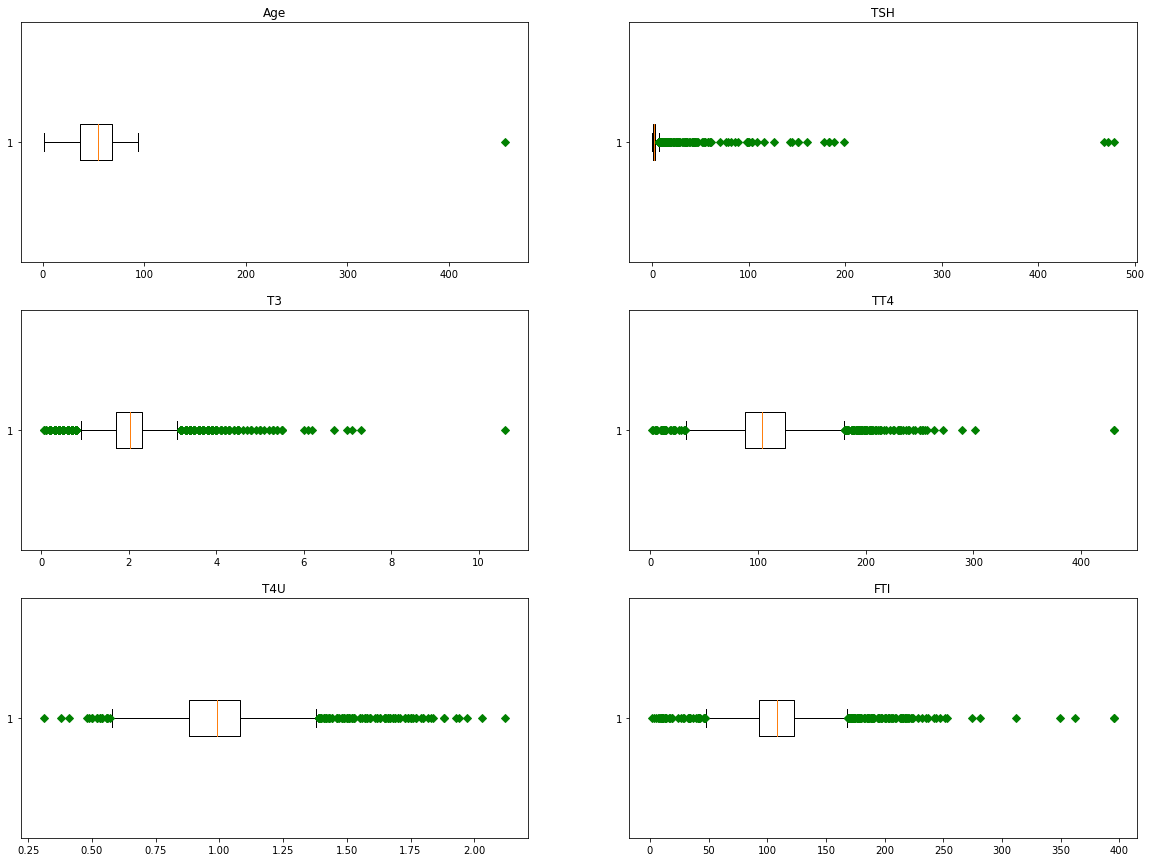

<Figure size 720x288 with 0 Axes>

In [9]:
#Outlier detection on specific columns

fig, axs = plt.subplots(3, 2, figsize= (20,15))
plt.figure(figsize=(10,4))
axs[0, 0].boxplot(thyroid_df['Age'],0,'gD',0)
axs[0, 0].set_title('Age')
axs[0, 1].boxplot(thyroid_df['TSH'],0,'gD',0)
axs[0, 1].set_title('TSH')
axs[1, 0].boxplot(thyroid_df['T3'],0,'gD',0)
axs[1, 0].set_title('T3')
axs[1, 1].boxplot(thyroid_df['TT4'],0,'gD',0)
axs[1, 1].set_title('TT4')
axs[2, 0].boxplot(thyroid_df['T4U'],0,'gD',0)
axs[2, 0].set_title('T4U')
axs[2, 1].boxplot(thyroid_df['FTI'],0,'gD',0)
axs[2, 1].set_title('FTI')


In [10]:
cont_cols = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for column in cont_cols:
    
        Q3 = np.quantile(thyroid_df[column], 0.75)
        Q1 = np.quantile(thyroid_df[column], 0.25)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR

        indices_out = thyroid_df.loc[(thyroid_df[column] > upper_range)].index
        thyroid_df.drop(index = indices_out, inplace = True)
            
thyroid_df.reset_index(drop=True, inplace = True)


# OLS ile sutun secimi yapilabilir
# Veriler bir tarafa yigildigi icin cozumu aranabilir

## Imbalanced Data
Veri setimiz dengesiz dağıldığı için oversampling yaparak, az sayıda olan sick olarak işaretlenmiş satırların sayısı negativeler ile eşitlendi.

<AxesSubplot:xlabel='Class', ylabel='count'>

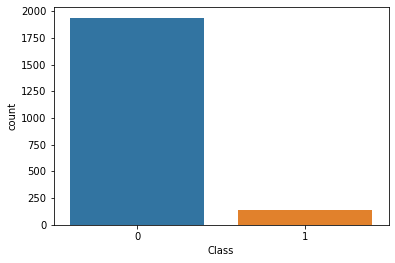

In [11]:
#Output degerimizin dagilimi inceledik.
sns.countplot(x=thyroid_df['Class'])

In [12]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_new, y_new = over_sampler.fit_resample(thyroid_df.iloc[:,0:-1], thyroid_df.iloc[:,-1:])

<AxesSubplot:xlabel='Class', ylabel='count'>

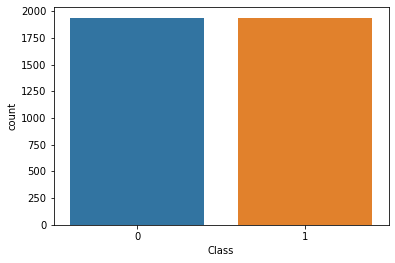

In [13]:
sns.countplot(x=y_new['Class'])

In [14]:
X_new

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.300000,1.0,2.500000,1.0,125.0,1.0,1.140000,1.0,109.000000
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.100000,1.0,2.000000,1.0,102.0,0.0,0.997912,0.0,110.787984
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.980000,0.0,2.023484,1.0,109.0,1.0,0.910000,1.0,120.000000
3,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.720000,1.0,1.200000,1.0,61.0,1.0,0.870000,1.0,70.000000
4,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.654025,0.0,2.023484,1.0,72.0,1.0,0.920000,1.0,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.910000,1.0,1.000000,1.0,102.0,1.0,0.910000,1.0,112.000000
3874,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.500000,1.0,0.700000,1.0,77.0,1.0,0.740000,1.0,104.000000
3875,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.035000,1.0,0.300000,1.0,87.0,1.0,0.690000,1.0,126.000000
3876,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.500000,1.0,0.800000,1.0,87.0,1.0,0.890000,1.0,98.000000


In [15]:
# Scaling all values for machine learning algorithms
new_df = pd.concat([X_new,y_new],axis=1)
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))

new_df = pd.DataFrame(scaler.fit_transform(new_df.values), columns=new_df.columns)

new_df.to_excel('yeni_veriler.xlsx')
new_df

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Class
0,0.430108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.196361,1.0,0.803279,1.0,0.692810,1.0,0.813725,1.0,0.621622,0.0
1,0.236559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.620925,1.0,0.639344,1.0,0.542484,0.0,0.674424,0.0,0.633703,0.0
2,0.483871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147839,0.0,0.647044,1.0,0.588235,1.0,0.588235,1.0,0.695946,0.0
3,0.741935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108415,1.0,0.377049,1.0,0.274510,1.0,0.549020,1.0,0.358108,0.0
4,0.623656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.704932,0.0,0.647044,1.0,0.346405,1.0,0.598039,1.0,0.412162,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,0.634409,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.137225,1.0,0.311475,1.0,0.542484,1.0,0.588235,1.0,0.641892,1.0
3874,0.623656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.833207,1.0,0.213115,1.0,0.379085,1.0,0.421569,1.0,0.587838,1.0
3875,0.634409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004549,1.0,0.081967,1.0,0.444444,1.0,0.372549,1.0,0.736486,1.0
3876,0.731183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.075057,1.0,0.245902,1.0,0.444444,1.0,0.568627,1.0,0.547297,1.0
